In [4]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("../commonlit-evaluate-student-summaries/summaries_train.csv")

In [3]:
data.prompt_id.value_counts()

39c16e    2057
3b9047    2009
ebad26    1996
814d6b    1103
Name: prompt_id, dtype: int64

In [7]:
data['text_length'] = data.text.str.count(' ') + 1

In [12]:
data_temp = data.drop(['student_id','prompt_id', 'text'], axis=1)

<Axes: >

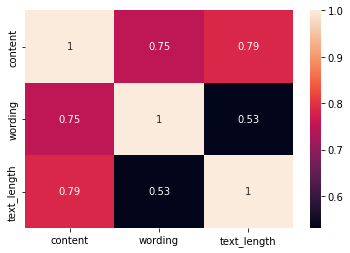

In [14]:
sns.heatmap(data_temp.corr(), annot=True)